In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
from numpy import correlate
from scipy.signal import correlate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 출력된 다른 이름
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 기호 깨짐 방지


In [ ]:
df = pd.read_csv('SN_total.csv')

,시간,원수 탁도,원수 pH,원수 알칼리도,원수 전기전도도,원수 수온,3단계 원수 유입 유량,3단계 1계열 응집제 주입률,3단계 침전지 탁도,3단계 침전지 체류시간,3단계 여과지 탁도
0,2020-01-01 12:59:00,2.477549,8.257175,54.961955,222.781944,4.616253,11183.916667,13.54400,0.282890,256.817051,0.045849
1,2020-01-01 13:29:00,2.439258,8.271153,55.155387,222.880161,4.629616,11205.916667,13.55400,0.291072,260.570714,0.046010
2,2020-01-01 13:59:00,2.421914,8.282444,55.320712,224.263970,4.629758,11503.791667,13.59700,0.297960,270.520977,0.045904
3,2020-01-01 14:29:00,2.398210,8.286200,55.872316,224.579963,4.626820,11781.125000,13.66800,0.312246,260.697341,0.050281
4,2020-01-01 14:59:00,2.408023,8.288734,56.368194,224.477999,4.620842,12237.833333,13.68725,0.317849,238.363311,0.047650
...,...,...,...,...,...,...,...,...,...,...,...
51565,2022-12-31 20:59:00,1.787780,7.822680,41.094511,184.020745,3.158893,9660.916667,12.99750,0.362827,301.454702,0.048515
51566,2022-12-31 21:29:00,1.784237,7.820758,40.703410,183.270915,3.163575,9705.458333,12.99750,0.362005,293.208228,0.048349
51567,2022-12-31 21:59:00,1.765750,7.818412,40.405968,182.062842,3.166926,9854.541667,12.99750,0.364164,289.729565,0.048677
51568,2022-12-31 22:29:00,1.785479,7.814997,40.534102,182.261220,3.177002,9093.500000,12.99750,0.358600,302.390668,0.048794


In [ ]:
df.columns

Index(['시간', '원수 탁도', '원수 pH', '원수 알칼리도', '원수 전기전도도', '원수 수온', '3단계 원수 유입 유량',
       '3단계 1계열 응집제 주입률', '3단계 침전지 탁도', '3단계 침전지 체류시간', '3단계 여과지 탁도'],
      dtype='object')

In [ ]:
raw = df.iloc[:, :-1].copy()
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51570 entries, 0 to 51569
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시간               51570 non-null  object 
 1   원수 탁도            51570 non-null  float64
 2   원수 pH            51570 non-null  float64
 3   원수 알칼리도          51570 non-null  float64
 4   원수 전기전도도         51570 non-null  float64
 5   원수 수온            51570 non-null  float64
 6   3단계 원수 유입 유량     51570 non-null  float64
 7   3단계 1계열 응집제 주입률  51570 non-null  float64
 8   3단계 침전지 탁도       51570 non-null  float64
 9   3단계 침전지 체류시간     51570 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.9+ MB


In [10]:
raw.set_index('시간', inplace=True)

KeyError: "None of ['시간'] are in the columns"

In [16]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51570 entries, 2020-01-01 12:59:00 to 2022-12-31 22:59:00
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   원수 탁도            51570 non-null  float64
 1   원수 pH            51570 non-null  float64
 2   원수 알칼리도          51570 non-null  float64
 3   원수 전기전도도         51570 non-null  float64
 4   원수 수온            51570 non-null  float64
 5   3단계 원수 유입 유량     51570 non-null  float64
 6   3단계 1계열 응집제 주입률  51570 non-null  float64
 7   3단계 침전지 탁도       51570 non-null  float64
 8   3단계 침전지 체류시간     51570 non-null  float64
dtypes: float64(9)
memory usage: 3.9 MB


In [18]:
raw.isnull().sum()

원수 탁도              0
원수 pH              0
원수 알칼리도            0
원수 전기전도도           0
원수 수온              0
3단계 원수 유입 유량       0
3단계 1계열 응집제 주입률    0
3단계 침전지 탁도         0
3단계 침전지 체류시간       0
dtype: int64

In [20]:
raw.describe()

,원수 탁도,원수 pH,원수 알칼리도,원수 전기전도도,원수 수온,3단계 원수 유입 유량,3단계 1계열 응집제 주입률,3단계 침전지 탁도,3단계 침전지 체류시간
count,51570.000000,51570.000000,51570.000000,51570.000000,51570.000000,51570.000000,51570.000000,51570.000000,51570.000000
mean,7.915337,7.951104,49.682840,189.804072,15.113768,10995.738930,17.639905,0.414046,268.128600
std,18.203877,0.389673,9.106287,26.467626,7.782268,1286.873404,5.637796,0.198434,33.094856
min,0.987731,5.229470,20.125278,11.342456,2.269878,0.000000,10.245000,0.017066,199.000000
25%,2.655978,7.677516,43.663559,174.897749,7.463329,10177.885417,13.995000,0.298610,244.441154
50%,4.187418,7.938845,49.108356,192.885491,16.220918,11190.375000,16.995000,0.361972,259.811049
75%,6.138988,8.220958,56.268209,208.257964,22.178035,11959.936422,18.997500,0.457362,284.490881
max,538.105986,9.140934,100.000000,263.674988,29.377546,16402.916667,82.937500,7.586750,889.336059


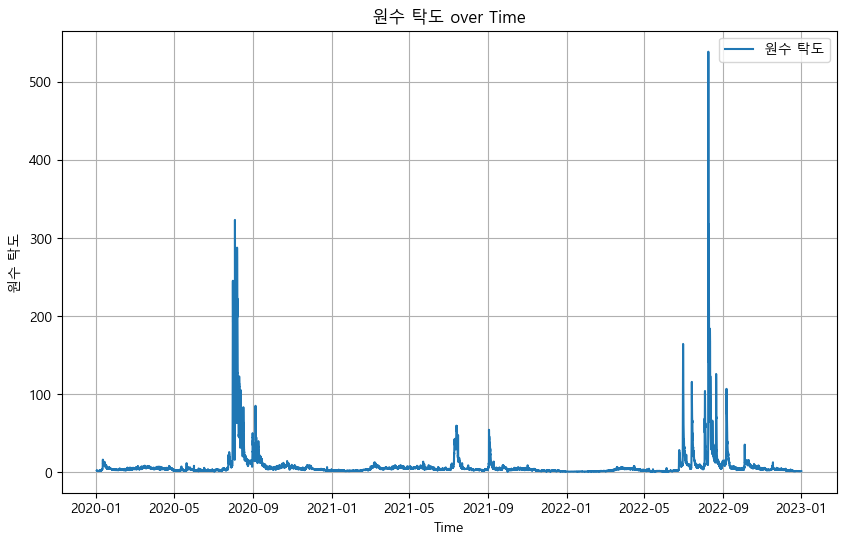

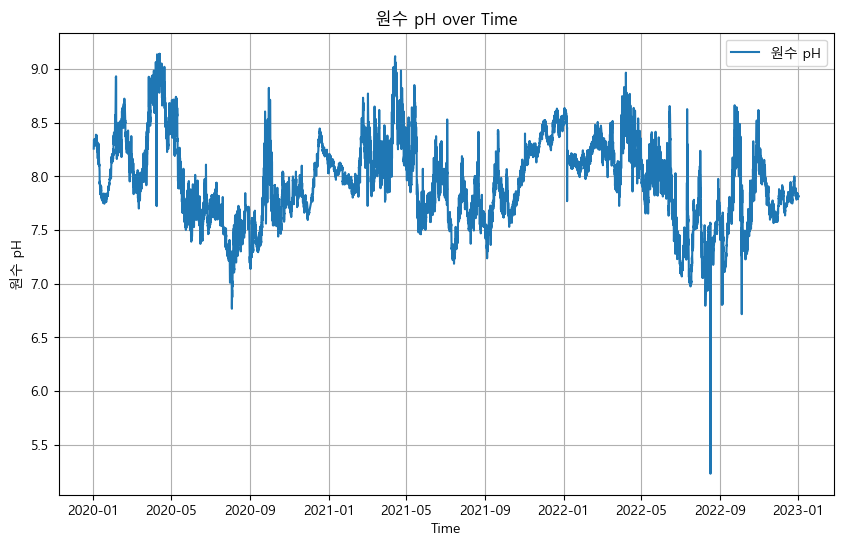

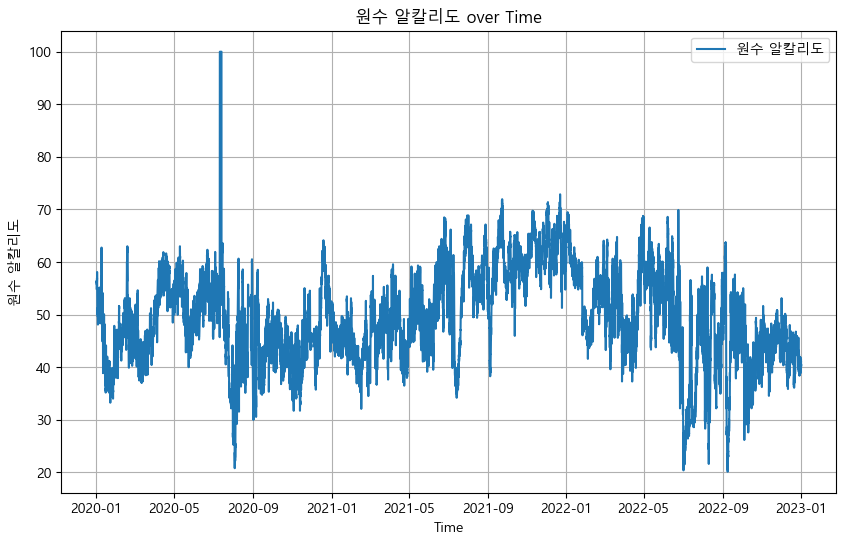

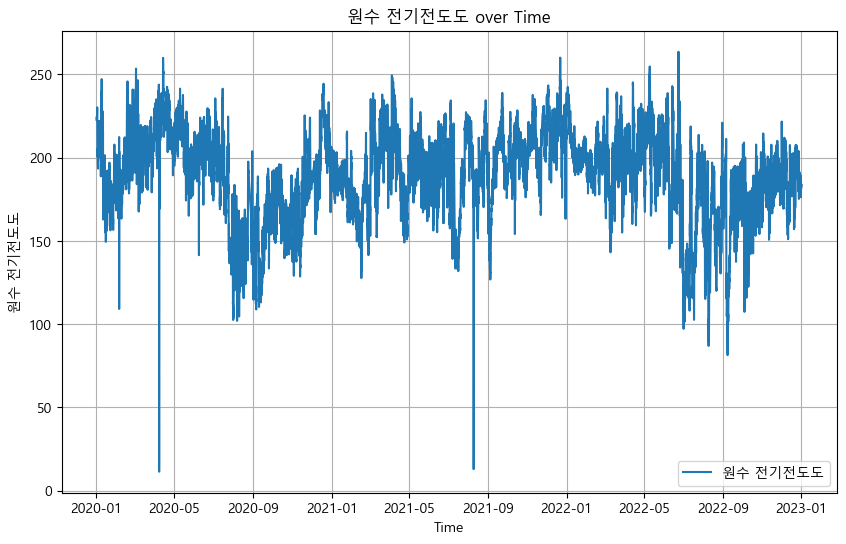

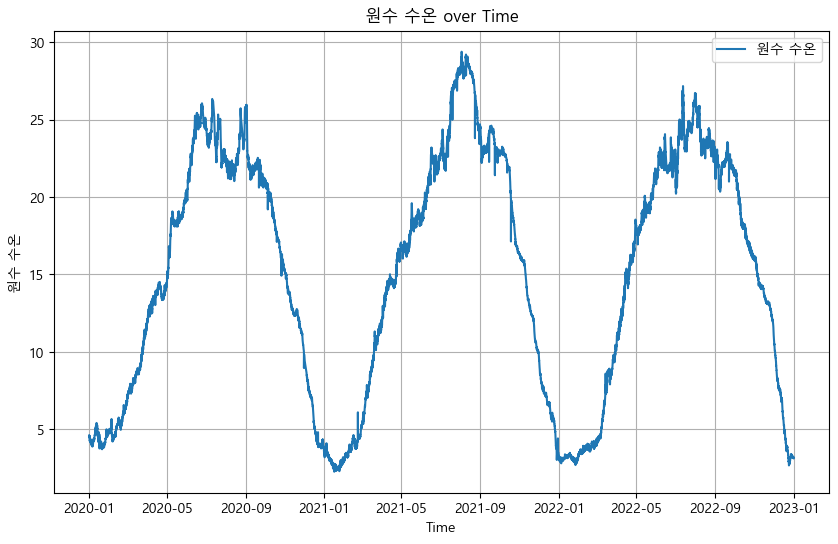

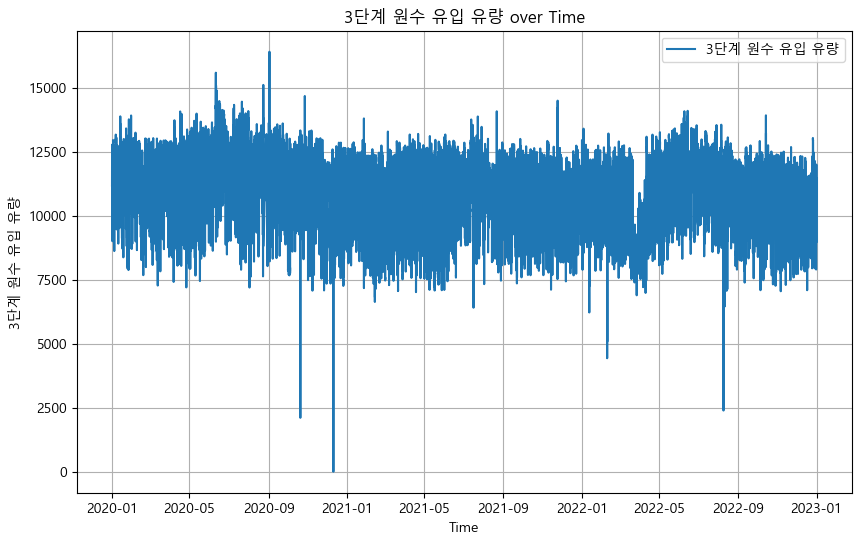

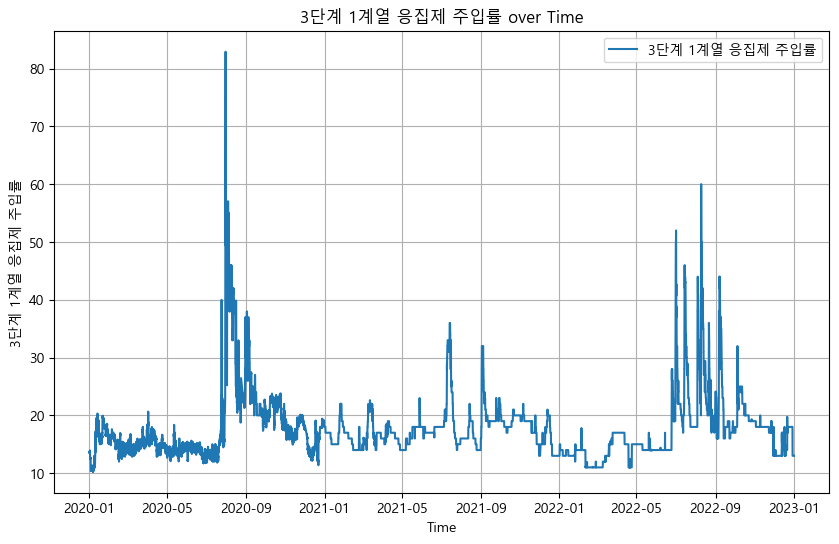

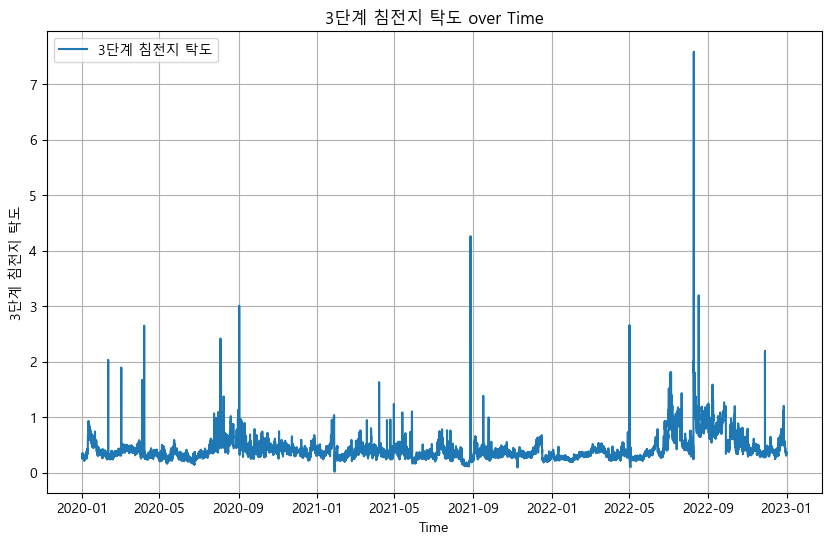

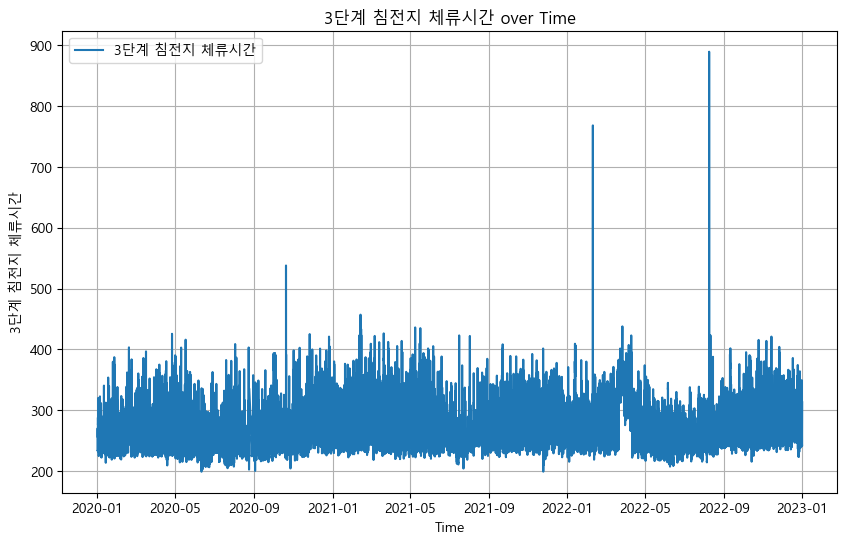

In [24]:
# raw 프레임의 각각의 열에 대해 plot

for col in raw.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(raw.index, raw[col], label=col)
    plt.title(f'{col} over Time')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

In [29]:
raw = raw.sort_index(ascending=True)

In [55]:
split_index = int(len(raw) * 0.8)
train = raw.iloc[:split_index]
test = raw.iloc[split_index:]

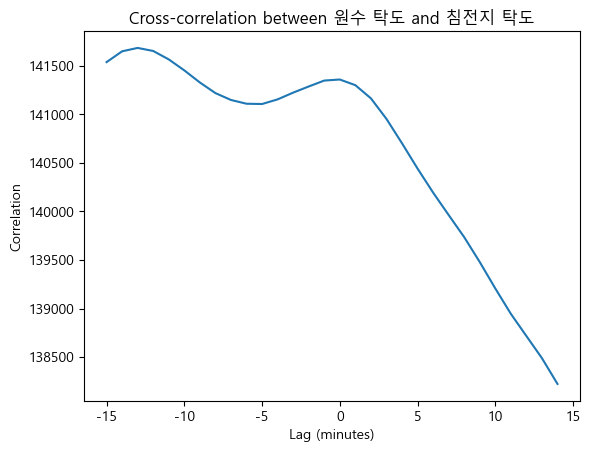

In [46]:
corr = correlate(train['원수 탁도'], train['3단계 침전지 탁도'], mode='full')

# 지연 시간 (lag)에 대한 시각화
lag = range(-len(train['원수 탁도']) + 1, len(train['원수 탁도']))
center = len(corr) // 2
plt.plot(list(lag)[center - 15 : center + 15], corr[center - 15 : center + 15])

# plt.plot(lag, corr)
plt.title("Cross-correlation between 원수 탁도 and 침전지 탁도")
plt.xlabel("Lag (minutes)")
plt.ylabel("Correlation")
plt.show()

In [47]:
# 100행만 추출하여 새로운 DataFrame 생성
sample_df = df.head(100)

# 100행만 CSV로 저장
sample_df.to_csv('sample_data.csv', index=False)


In [42]:
corr = correlate(train['원수 탁도'], train['3단계 침전지 탁도'], mode='full')
lag = range(-len(train['원수 탁도']) + 1, len(train['원수 탁도']))

# 가장 높은 상관관계를 가지는 lag 값 찾기
max_corr_index = corr.argmax()
best_lag = list(lag)[max_corr_index]

print(f"가장 높은 상관관계를 가지는 지연 시간(lag): {best_lag}분")

가장 높은 상관관계를 가지는 지연 시간(lag): -13분


In [57]:
# 3시간 이동 평균
train.loc[:, '원수 탁도_3시간_이동평균'] = train['원수 탁도'].rolling(window=6).mean()

# 6시간 이동 평균
train.loc[:, '원수 탁도_6시간_이동평균'] = train['원수 탁도'].rolling(window=12).mean()

# 12시간 이동 평균
train.loc[:, '원수 탁도_12시간_이동평균'] = train['원수 탁도'].rolling(window=24).mean()

# 기타 변수들에 대한 이동 평균 생성
train.loc[:, '원수 pH_3시간_이동평균'] = train['원수 pH'].rolling(window=6).mean()
train.loc[:, '원수 전기전도도_3시간_이동평균'] = train['원수 전기전도도'].rolling(window=6).mean()


In [58]:
# 테스트 데이터에서 이동 평균 특성 생성
test.loc[:, '원수 탁도_3시간_이동평균'] = test['원수 탁도'].rolling(window=6).mean()
test.loc[:, '원수 탁도_6시간_이동평균'] = test['원수 탁도'].rolling(window=12).mean()
test.loc[:, '원수 탁도_12시간_이동평균'] = test['원수 탁도'].rolling(window=24).mean()

test.loc[:, '원수 pH_3시간_이동평균'] = test['원수 pH'].rolling(window=6).mean()
test.loc[:, '원수 전기전도도_3시간_이동평균'] = test['원수 전기전도도'].rolling(window=6).mean()


In [60]:
# NaN 값을 0으로 채우기
train.loc[:, :] = train.fillna(0)
test.loc[:, :] = test.fillna(0)


In [61]:
# 예시로 특성들 (X)과 타겟 (y) 정의
X_train = train[['원수 탁도_3시간_이동평균', '원수 pH_3시간_이동평균', '원수 전기전도도_3시간_이동평균']]
y_train = train['3단계 침전지 탁도']

X_test = test[['원수 탁도_3시간_이동평균', '원수 pH_3시간_이동평균', '원수 전기전도도_3시간_이동평균']]
y_test = test['3단계 침전지 탁도']


In [62]:

# 모델 초기화
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# 모델 초기화 (max_depth 값을 여러 가지로 시도)
max_depth_values = [2, 3, 4, 5, 6, 7, 8]  # max_depth에 대한 후보값들

# 결과 저장용 리스트
cv_results = []

for max_depth in max_depth_values:
    # 모델 정의
    model = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)
    
    # 교차검증 (5-fold cross-validation)
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # 평균 MSE 값 (cross_val_score는 음수로 반환되므로 부호를 반전)
    mean_mse = -cv_score.mean()
    cv_results.append((max_depth, mean_mse))
    print(f"max_depth={max_depth}: 평균 MSE = {mean_mse}")

# max_depth=2 가 가장 적합


max_depth=2: 평균 MSE = 0.014330505195203305
max_depth=3: 평균 MSE = 0.01557722346445386
max_depth=4: 평균 MSE = 0.01578069508894733
max_depth=5: 평균 MSE = 0.01569464294085037
max_depth=6: 평균 MSE = 0.016029909476236257
max_depth=7: 평균 MSE = 0.016138046909869752


In [64]:

# 예측
y_pred = model.predict(X_test)

# 성능 평가: MSE와 RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MSE: 0.09750447476134161
RMSE: 0.31225706519043184
